In [15]:
import os
import numpy as np
import pandas as pd
import ast
import torch
import PIL
from tqdm.auto import tqdm
import shutil as sh
from pathlib import Path
import random
from ultralytics import YOLO
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
Setup complete ✅ (8 CPUs, 15.5 GB RAM, 137.0/1006.9 GB disk)

OS                  Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
Environment         Linux
Python              3.10.14
Install             pip
RAM                 15.49 GB
CPU                 11th Gen Intel Core(TM) i7-1165G7 2.80GHz
CUDA                12.1

numpy               ✅ 1.23.2<2.0.0,>=1.23.0
matplotlib          ✅ 3.9.2>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.2.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytics-thop    ✅ 2.0.8>=2.0.0
torch               ✅ 2.2.2!=2.4.0,

In [3]:
!pip install albumentations==1.0.3
display.clear_output()
!pip show albumentations

Name: albumentations
Version: 1.0.3
Summary: Fast image augmentation library and easy to use wrapper around other libraries
Home-page: https://github.com/albumentations-team/albumentations
Author: Buslaev Alexander, Alexander Parinov, Vladimir Iglovikov, Eugene Khvedchenya, Druzhinin Mikhail
Author-email: 
License: MIT
Location: /home/hassaan/miniconda3/envs/emo/lib/python3.10/site-packages
Requires: numpy, opencv-python-headless, PyYAML, scikit-image, scipy
Required-by: 


In [4]:
# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/home/hassaan/repos/yolov11_on_red_palm_weevil/data_custom.yaml",  # path to dataset YAML
    epochs=50,  # number of training epochs
    imgsz=64,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/hassaan/repos/yolov11_on_red_palm_weevil/data_custom.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /home/hassaan/repos/yolov11_on_red_palm_weevil/datasets/train/labels.cache... 534 images, 0 backgrounds,

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/hassaan/repos/yolov11_on_red_palm_weevil/datasets/valid/labels.cache... 30 images, 0 backgrounds, 0 


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.168G      2.075      3.347      1.509         15         64: 100%|██████████| 34/34 [00:10<00:00,  3.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31     0.0457      0.774      0.353      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.168G      1.859      2.377      1.357         16         64: 100%|██████████| 34/34 [00:09<00:00,  3.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.738      0.613      0.602      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.168G      1.821      1.427      1.306         13         64: 100%|██████████| 34/34 [00:12<00:00,  2.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.581       0.71      0.571      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.168G      1.682      1.134      1.276         19         64: 100%|██████████| 34/34 [00:10<00:00,  3.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.439      0.581      0.474      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.168G      1.615     0.9893      1.259         18         64: 100%|██████████| 34/34 [00:11<00:00,  2.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.698      0.645      0.649      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.168G      1.516      0.933      1.232         17         64: 100%|██████████| 34/34 [00:11<00:00,  3.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.667      0.613      0.693      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.168G      1.513     0.9261      1.238         15         64: 100%|██████████| 34/34 [00:09<00:00,  3.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.724      0.806      0.806      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.168G      1.425     0.8665      1.203         20         64: 100%|██████████| 34/34 [00:10<00:00,  3.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.815      0.613       0.78      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.168G      1.432     0.8661      1.205         23         64: 100%|██████████| 34/34 [00:11<00:00,  2.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.706      0.696      0.776      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.168G      1.391     0.8338      1.194         17         64: 100%|██████████| 34/34 [00:13<00:00,  2.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.728      0.775      0.794      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.168G      1.383     0.8368      1.187         17         64: 100%|██████████| 34/34 [00:12<00:00,  2.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.623      0.677       0.73      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.168G      1.383     0.8305      1.187         16         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.842       0.86       0.89      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.168G      1.347     0.8209      1.171         18         64: 100%|██████████| 34/34 [00:11<00:00,  3.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.835      0.645      0.778      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.168G      1.365     0.8097      1.186         12         64: 100%|██████████| 34/34 [00:12<00:00,  2.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.821      0.888       0.92      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.168G      1.296     0.8009      1.166         14         64: 100%|██████████| 34/34 [00:16<00:00,  2.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.851       0.71      0.801      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.168G      1.302     0.7692      1.166         12         64: 100%|██████████| 34/34 [00:16<00:00,  2.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.665      0.742      0.727      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.168G      1.315     0.8004      1.177         14         64: 100%|██████████| 34/34 [00:13<00:00,  2.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.741      0.839      0.854        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.168G       1.29     0.7766      1.165         15         64: 100%|██████████| 34/34 [00:16<00:00,  2.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.814      0.903      0.871      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.168G      1.292     0.7632      1.154         19         64: 100%|██████████| 34/34 [00:11<00:00,  2.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31       0.93      0.861      0.919      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.168G      1.223     0.7597      1.142         21         64: 100%|██████████| 34/34 [00:15<00:00,  2.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.961      0.801       0.91      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.168G      1.247     0.7823      1.144         18         64: 100%|██████████| 34/34 [00:11<00:00,  2.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.895      0.903      0.939      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.168G      1.222     0.7733      1.134         17         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31       0.85      0.839      0.907      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.168G      1.249     0.7467       1.15         16         64: 100%|██████████| 34/34 [00:13<00:00,  2.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.811      0.831      0.902      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.168G       1.24     0.7594      1.132         18         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.897      0.935      0.934      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.168G      1.193     0.7274      1.122         13         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.895      0.839      0.914      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.168G      1.186     0.7173      1.117         17         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.816       0.86      0.914      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.168G      1.187     0.7221      1.123         16         64: 100%|██████████| 34/34 [00:14<00:00,  2.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.866      0.871       0.91      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.168G      1.222     0.7398      1.139         14         64: 100%|██████████| 34/34 [00:15<00:00,  2.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.898      0.854      0.933      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.168G      1.214      0.737      1.129         16         64: 100%|██████████| 34/34 [00:16<00:00,  2.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.961      0.903      0.949      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.168G      1.163     0.7176      1.106         21         64: 100%|██████████| 34/34 [00:15<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.915      0.903      0.954      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.168G      1.137     0.7041       1.12         16         64: 100%|██████████| 34/34 [00:14<00:00,  2.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.853      0.935      0.932      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.168G      1.169     0.7024      1.123         15         64: 100%|██████████| 34/34 [00:18<00:00,  1.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.858      0.903      0.935       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.168G      1.159     0.7018      1.111         20         64: 100%|██████████| 34/34 [00:12<00:00,  2.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.833      0.968      0.946      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.168G      1.144     0.7092       1.11         18         64: 100%|██████████| 34/34 [00:17<00:00,  1.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.965      0.806      0.937      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.168G      1.123     0.6926      1.115         10         64: 100%|██████████| 34/34 [00:14<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.838      0.871      0.861      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.168G      1.128     0.6829      1.108         16         64: 100%|██████████| 34/34 [00:11<00:00,  2.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.901       0.88      0.943      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.168G       1.14     0.6976      1.109         16         64: 100%|██████████| 34/34 [00:10<00:00,  3.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.934       0.91      0.952      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.168G      1.121     0.6756      1.108         20         64: 100%|██████████| 34/34 [00:17<00:00,  2.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31          1      0.799      0.971      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.168G      1.112     0.6692      1.096         17         64: 100%|██████████| 34/34 [00:18<00:00,  1.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.979      0.839      0.955      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.168G      1.111     0.6703      1.097         14         64: 100%|██████████| 34/34 [00:14<00:00,  2.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.947      0.903      0.955      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.168G      1.029     0.8557      1.133          6         64: 100%|██████████| 34/34 [00:13<00:00,  2.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.921      0.903      0.911       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.168G     0.9494      0.687      1.112          6         64: 100%|██████████| 34/34 [00:12<00:00,  2.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.926      0.903      0.949      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.168G     0.9691     0.6331      1.089          6         64: 100%|██████████| 34/34 [00:17<00:00,  1.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.929      0.968      0.965      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.168G     0.9668     0.6266      1.097          6         64: 100%|██████████| 34/34 [00:18<00:00,  1.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.931      0.871      0.961       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.168G     0.9637      0.597      1.094          6         64: 100%|██████████| 34/34 [00:13<00:00,  2.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.971      0.903      0.956      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.168G     0.9526     0.5899      1.118          6         64: 100%|██████████| 34/34 [00:14<00:00,  2.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.989      0.903      0.989      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.168G     0.8595     0.5562      1.066          6         64: 100%|██████████| 34/34 [00:17<00:00,  1.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31       0.97      0.968      0.994      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.168G     0.8807     0.5446      1.074          6         64: 100%|██████████| 34/34 [00:14<00:00,  2.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.942      0.968      0.962       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.168G     0.9059     0.5445      1.061          6         64: 100%|██████████| 34/34 [00:10<00:00,  3.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.957          1      0.993      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.168G     0.8823     0.5419      1.077          6         64: 100%|██████████| 34/34 [00:14<00:00,  2.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         30         31      0.911          1      0.991      0.601



50 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 5.4MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         30         31      0.989      0.903      0.989      0.618
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train18


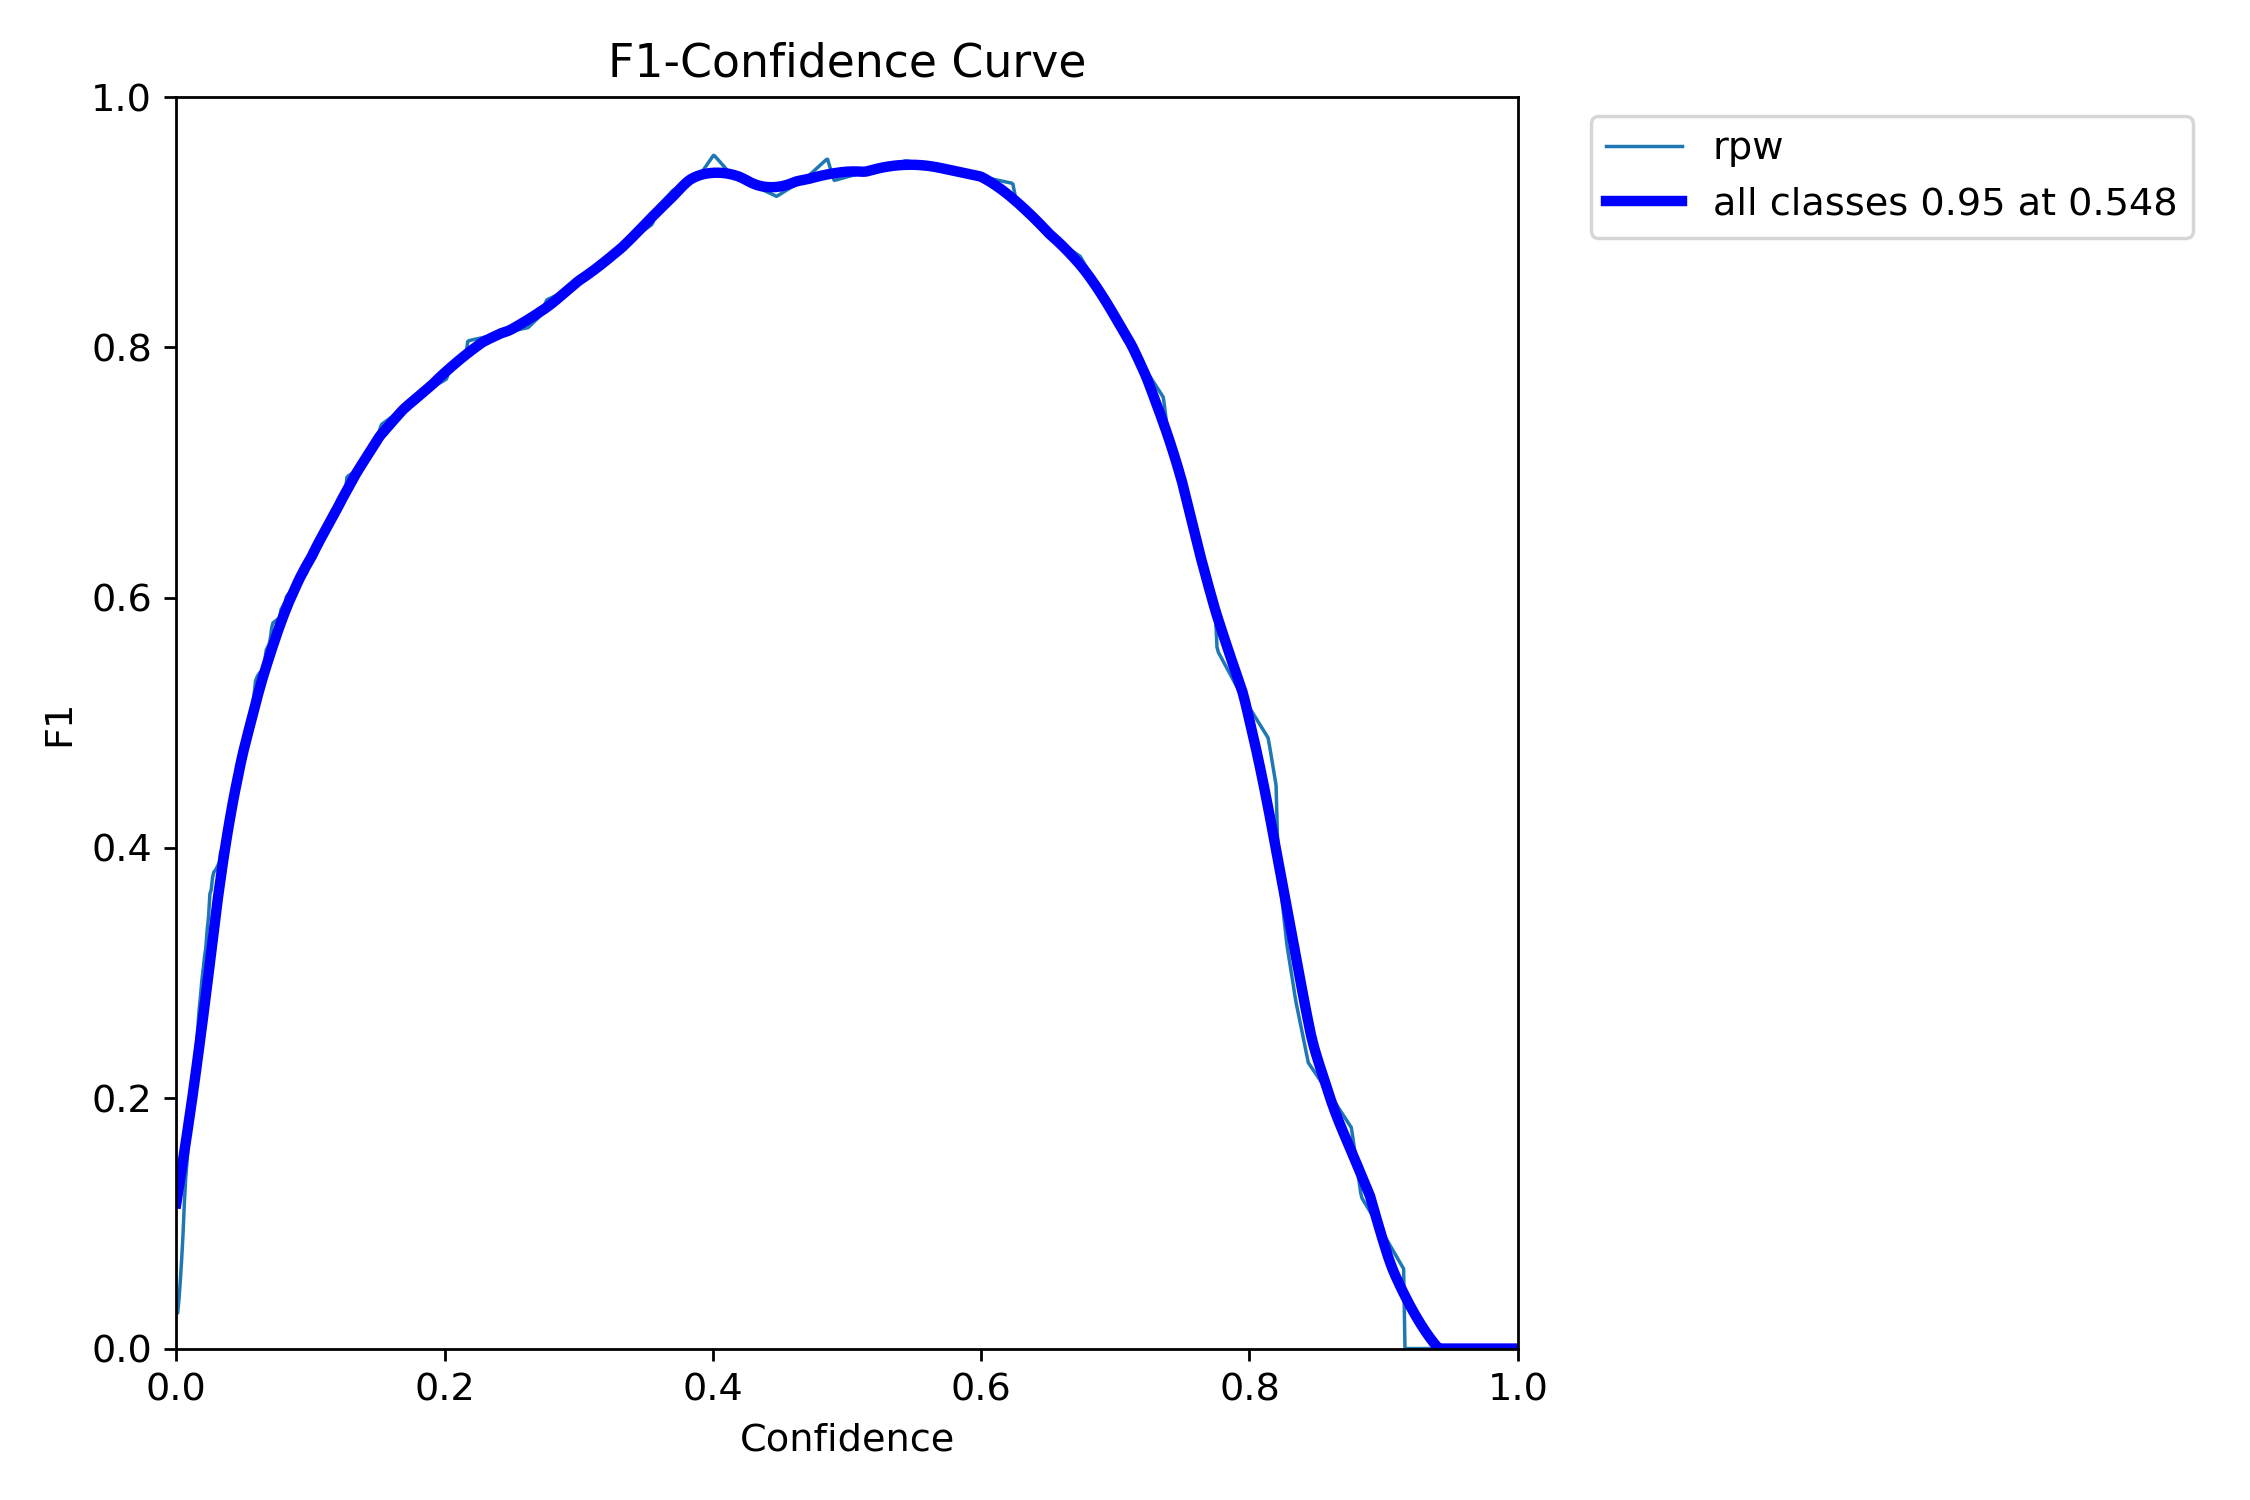

In [6]:
display.Image(filename='runs/detect/train/F1_curve.png', width=600)

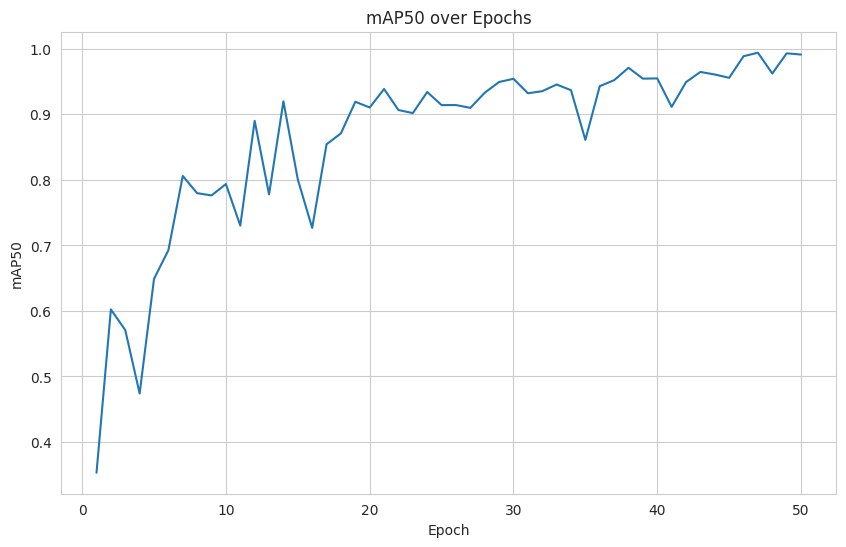

In [17]:
# Read the CSV file
df = pd.read_csv("runs/detect/train/results.csv")

# 1. Using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['                  epoch'], df['       metrics/mAP50(B)'])
plt.title('mAP50 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.grid(True)
plt.show()

## Prediction

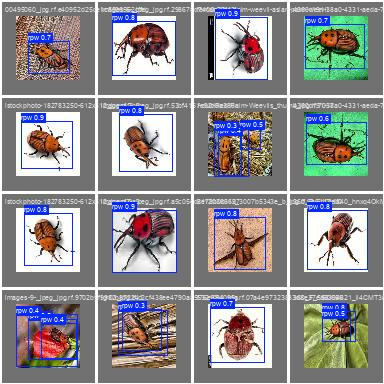

In [9]:
display.Image(filename='runs/detect/train/val_batch0_pred.jpg', width=1000)

In [12]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/hassaan/repos/yolov11_on_red_palm_weevil/datasets/valid/labels.cache... 30 images, 0 backgrounds, 0 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00


                   all         30         31      0.989      0.903      0.989      0.622
Speed: 2.0ms preprocess, 3.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train18


array([    0.62197])


0: 64x64 1 rpw, 27.7ms
Speed: 1.0ms preprocess, 27.7ms inference, 2.2ms postprocess per image at shape (1, 3, 64, 64)


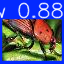

In [13]:
# Run batched inference on a list of images

# Get a list of all image files in the folder
image_files = ['datasets/test/images/charancon-340_jpg.rf.014042ac480480af99efbb95a339679c.jpg']

# Run batched inference on the list of images
results = model(image_files)
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk